# 1. 데이터: Elevator Predictive Maintenance Dataset
- 엘리베이터의 갑작스러운 고장을 예방하기 위한 데이터 셋
- 엘리베티어에 대한 전자 센서 값에 기반한 데이터 셋
- 변수 "vibration"을 추정하는 것이 목적

In [ ]:
!git clone https://github.com/kc9410/Model_Evaluation.git

In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Model_Evaluation/data/predictive_maintenance.csv')

In [2]:
df.columns

Index(['ID', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4',
       'x5'],
      dtype='object')

In [3]:
labels = df.loc[:,'vibration']

In [4]:
df = df.drop('vibration',axis=1)

In [5]:
using_df = df.drop('ID',axis=1)

In [6]:
float_data = np.array(using_df)

# 2. Data Split
- 학습 데이터와 평가에 사용할 데이터 셋을 적절하게 나누어줘야 함
- 7:2.5의 비율로 랜덤 추출 방식을 활용하여 데이터 셋을 분할

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(float_data, labels, test_size=0.25, random_state=42)

# 3. 모델 학습
- 선형 회귀 모델과 랜덤 포레스트 모델을 사용하여 학습을 진행
- 각 모델에 대한 MAE와 MAPE를 측정

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [10]:
line_fitter = LinearRegression()
line_fitter.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
ranfo_fitter = RandomForestRegressor(n_estimators=50,n_jobs=-1,max_depth=10)
ranfo_fitter.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# 4-1. 선형 회귀 모델 평가

In [12]:
import matplotlib.pyplot as plt

In [13]:
pred_train = line_fitter.predict(X_train)
pred_test = line_fitter.predict(X_test)

In [14]:
def MAE(pred,real) :
    return round(np.mean(np.abs(pred-real)),3)
def MAPE(pred,real) :
    return round(np.mean(np.abs((pred-real)/(real+1e-10)))*100,1)

In [15]:
print("MAE_train:", MAE(pred_train,y_train))
print("MAE_test:", MAE(pred_test,y_test))
print("MAPE_train:", MAPE(pred_train,y_train),"%")
print("MAPE_test:", MAPE(pred_test,y_test),"%")

MAE_train: 0.205
MAE_test: 0.208
MAPE_train: 1.0 %
MAPE_test: 1.0 %


In [16]:
result_df = pd.DataFrame([pred_train,y_train]).transpose()

In [17]:
result_df.columns = ['pred','real']
result_df[:10]

,pred,real
0,21.487649,21.78
1,21.452773,21.91
2,21.485651,21.33
3,23.327457,23.26
4,19.231271,19.10
5,22.875112,22.92
6,21.394693,21.09
7,21.504563,21.69
8,21.498616,21.71
9,17.764097,18.12


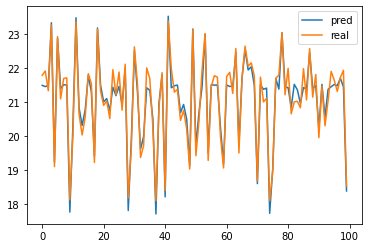

In [18]:
plt.plot(result_df.pred[0:100],label='pred')
plt.plot(result_df.real[0:100],label='real')
plt.legend()

In [19]:
result_df = pd.DataFrame([pred_test,y_test]).transpose()

In [20]:
result_df.columns = ['pred','real']
result_df[:10]

,pred,real
0,21.509891,21.44
1,21.468733,21.83
2,20.026666,19.73
3,21.477367,21.81
4,21.452678,21.87
5,21.503994,21.42
6,18.432714,18.58
7,21.508736,21.00
8,21.501605,21.41
9,18.251137,18.44


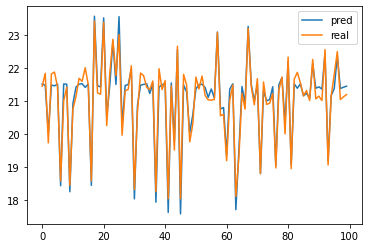

In [21]:
plt.plot(result_df.pred[0:100],label='pred')
plt.plot(result_df.real[0:100],label='real')
plt.legend()

# 4-2. 랜덤 포레스트 모델 평가

In [22]:
pred_train = ranfo_fitter.predict(X_train)
pred_test = ranfo_fitter.predict(X_test)

In [23]:
print("MAE_train:", MAE(pred_train,y_train))
print("MAE_test:", MAE(pred_test,y_test))
print("MAPE_train:", MAPE(pred_train,y_train),"%")
print("MAPE_test:", MAPE(pred_test,y_test),"%")

MAE_train: 0.01
MAE_test: 0.014
MAPE_train: 0.0 %
MAPE_test: 0.1 %


In [24]:
result_df = pd.DataFrame([pred_train,y_train]).transpose()

In [25]:
result_df.columns = ['pred','real']
result_df[:10]

,pred,real
0,21.755315,21.78
1,21.936090,21.91
2,21.330229,21.33
3,23.258865,23.26
4,19.095209,19.10
5,22.920200,22.92
6,21.075616,21.09
7,21.654546,21.69
8,21.738401,21.71
9,18.114750,18.12


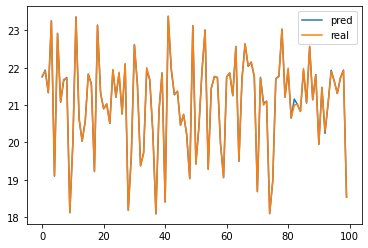

In [26]:
plt.plot(result_df.pred[0:100],label='pred')
plt.plot(result_df.real[0:100],label='real')
plt.legend()

In [27]:
result_df = pd.DataFrame([pred_test,y_test]).transpose()

In [28]:
result_df.columns = ['pred','real']
result_df[:10]

,pred,real
0,21.438747,21.44
1,21.836442,21.83
2,19.731199,19.73
3,21.825157,21.81
4,21.849802,21.87
5,21.426673,21.42
6,18.577329,18.58
7,21.629524,21.00
8,21.423489,21.41
9,18.440000,18.44


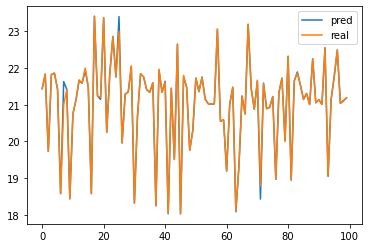

In [29]:
plt.plot(result_df.pred[0:100],label='pred')
plt.plot(result_df.real[0:100],label='real')
plt.legend()